### Generating Random numbers that follow Gaussian Distribution from Uniform Random numbers using Central Limit Theoram.  The values of k are 3,6,9,12,15. The number of random numbers generated in this manner are 10000. (N = 10000) 

In [1]:
import numpy as np
import random
from matplotlib.pylab import *
import time 
%matplotlib inline

### Defining a function for generating random numbers using linear congruence rule 

In [2]:
def crand():
    seed = 13456789
    a = 11
    m = 10000
    l = []
    for i in range(10000):
        seed = (seed*(a**i))%m
        l.append(((seed/m)*12)-6)
    return l

In [3]:
rand = crand()
rand = np.array(rand)

### Counting the frequency distribution of the generated random numbers by classifying into different bins

In [4]:
nob = 100
counter_list = [0]*nob
for l in rand:
    for i in range(nob):
        if l > ((12.0/nob)*i)-6 and l <= ((12.0/nob)*(i+1))-6:
            counter_list[i]+=1         

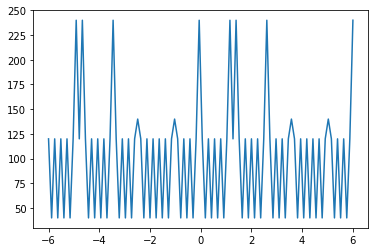

In [5]:
z = linspace(-6,6,nob)
plot(z,counter_list)
show()

### Calculating the mean and variance of the above distribution

In [6]:
mean = 0
variance = 0 
for l in rand:
    mean+=l
mean/=len(rand)
for l in rand:
    variance += (l - mean)**2
variance/=len(rand)
print(mean,variance)

-0.007199999999999955 12.075472800000133


### Generating gaussian distribution using central limit theoram

In [7]:
gaussian_list= [[] for _ in range(5)]
#print(gaussian_list)
for i in range(10000):   
    update_list = [0]*5
    count = 0
    for j in range(3,18,3):
        for k in range(j):
            np.random.shuffle(rand)
            update_list[count] += rand[k]
        count += 1   
    for i in range(5):
        gaussian_list[i].append(update_list[i])
for i in range(5):
    gaussian_list[i] = np.array(gaussian_list[i])
gaussian_list = np.array(gaussian_list)

### Plotting the distribution with different k values

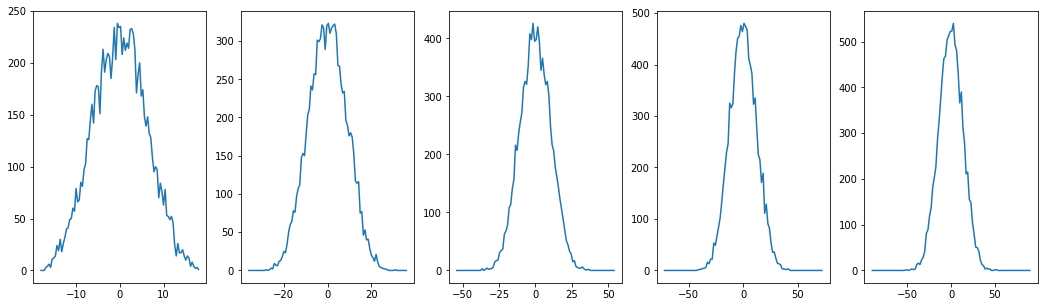

In [8]:
figure(figsize = (18,5))    
z = [[]]*5
for i in range(5):
    z[i] = linspace(-18*(i+1),18*(i+1),nob)
counter_list1 = [[0]*nob for _ in range(5)] 
for i in range(5):
    for l in gaussian_list[i]:
        for j in range(nob):
            if l > (((36*(i+1))/nob)*j)-(18*(i+1)) and l <= (((36*(i+1))/nob)*(j+1))-(18*(i+1)):
                counter_list1[i][j] += 1            
for i in range(5):
    subplot(1,5,i+1)
    plot(z[i],counter_list1[i])   
show()